In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
import os

In [4]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [14]:
for subdir, _, _ in os.walk(RESULTS_DIR):
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
#         print subdir
        #check which ones are really missing
        missing = []
        for i in range(1,13):
            if not os.path.exists(subdir + '/' + str(i).zfill(2) + '_noise.p'):
                missing.append(i)
        
#         print subdir, len(os.listdir(subdir))
    
        

        classifier = subdir.split('/')[-1]
        dataset = subdir.split('/')[-2]
        experiment = subdir.split('/')[-3]
        
        print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch', missing, len(os.listdir(subdir))
        
#         with open('../SLURMS/Figure1/'+experiment + '_' + str(dataset) + '_' + classifier +'_True.sbatch', 'r') as f:
            
#             old_content = f.read()
# #             print old_content.split('--array=')[0]
#             old_job_array = old_content.split('--array=')[1].split('\n')[0]
    
#             new_slurm = old_content.replace(old_job_array, ','.join([str(m) for m in missing]))
    
#         with open('../SLURMS/Figure1/'+experiment + '_' + str(dataset) + '_' + classifier +'_True.sbatch', 'w') as f:
#             f.write(new_slurm)
    
#             break

sbatch C.Figure1.angle_2_MLP_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_2_LeNet_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_2_XCEPTION_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_2_VGG19_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_1_MLP_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_1_LeNet_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_1_XCEPTION_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_1_VGG19_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_0_MLP_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_0_LeNet_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_0_XCEPTION_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.angle_0_VGG19_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.position_non_aligned_scale_2_MLP_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.position_non_aligned_scale_2_LeNet_True.sbatch [9, 10, 11, 12] 16
sbatch C.Figure1.position_non_aligned_scale_2_XCEPTION_True.sbatch [9, 10, 11, 12] 16
sba

KeyboardInterrupt: 

In [6]:
import glob
import cPickle as pickle

In [20]:
experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']
all_labels = {'C.Figure1.position_common_scale': ['Position Y', '+ Position X', '+ Spotsize'], \
              'C.Figure1.position_non_aligned_scale': ['Position Y', '+ Position X', '+ Spotsize'],\
              'C.Figure1.length': ['Length', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], \
              'C.Figure1.angle': ['Angle', '+ Position Y', '+ Position X'], \
              'C.Figure1.area': ['Area', '+ Position Y', '+ Position X'], \
              'C.Figure1.volume': ['Volume', '+ Position Y', '+ Position X'], \
              'C.Figure1.curvature': ['Curvature', '+ Position Y', '+ Position X'], \
              'C.Figure1.shading': ['Shading', '+ Position Y', '+ Position X']
              }

presets = {
 'C.Figure1.position_common_scale': 40, \
 'C.Figure1.position_non_aligned_scale': 10, \
 'C.Figure1.length': 35, \
 'C.Figure1.direction': 215, \
 'C.Figure1.angle': 60, \
 'C.Figure1.area': 20, \
 'C.Figure1.volume': 18, \
 'C.Figure1.curvature': 50, \
 'C.Figure1.shading': 80
}

In [8]:
all_results = {}

for experiment in experiments:

    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))
#     print datasets
    results = [None]*4

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        results[i] = []
        for d in datasets:
            d_dir = os.path.join(e_dir, d)

#             stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            stats_files = glob.glob(os.path.join(d_dir, c)+'/*.p')
#             print stats_files
#             break
            MLAEs = []

            for s in stats_files:
#                 stats_file = os.path.join(d_dir, c)+'/'+s
                stats_file = s
#                 print s
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as f:
                        stats = pickle.load(f)
                    MLAEs.append(stats['MLAE'])

            results[i].append(MLAEs)
            
    print 'Loaded', experiment
            
    all_results[experiment] = results
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

Loaded C.Figure1.position_common_scale
Loaded C.Figure1.position_non_aligned_scale
Loaded C.Figure1.length
Loaded C.Figure1.direction
Loaded C.Figure1.angle
Loaded C.Figure1.area
Loaded C.Figure1.volume
Loaded C.Figure1.curvature
Loaded C.Figure1.shading


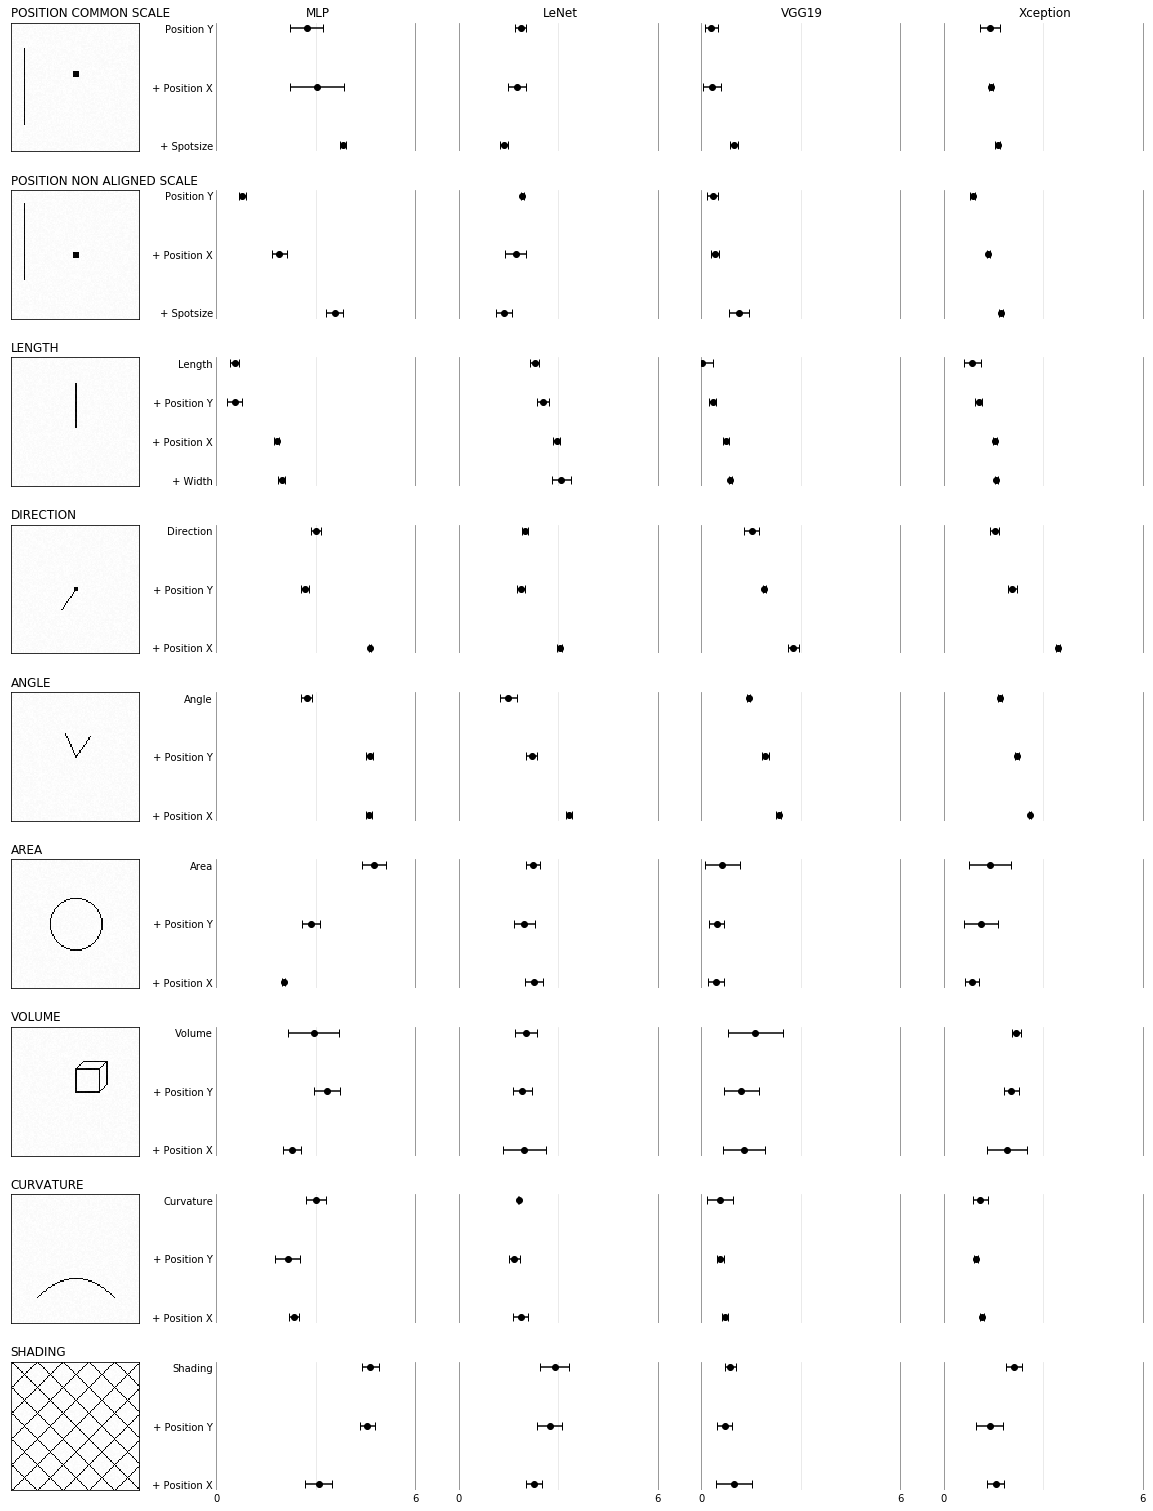

In [29]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(21,len(experiments)*3), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 5, width_ratios=[1,1,1,1,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments

j = 0
for experiment in experiments:
    
    for i,c in enumerate(['Image','MLP', 'LeNet', 'VGG19', 'Xception']):

        fig = plt.subplot(gs[j])
        j += 1

        
        if i == 0:
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

        if j <= len(classifiers)+1:
            plt.title(c)
            

        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i-1]
    
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor
#         print quarter
        data = [r[quarter:-quarter] for r in sorted_data]
#         print sorted_data
#         print 'before', data
#         data = sorted_data[quarter:-quarter]
#         print 'after', data
    
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
#         print means
        
#         confidence = [mean_confidence_interval(r)[3] for r in data]
        
        confidence = [1.96*np.std(r) for r in data]
        confidence = confidence[::-1]
        
#         # sort the means
#         means.sort()
#         print 'MEANS SORTED', means
        
#         # cut the midmean
#         means = means[1,2]
#         confidence = confidence[1,2]
        
        
#         data_dict = {}
#         data_dict['x'] = means
#         data_dict['xerr'] = confidence
#         data_dict['y'] = 
        
        
        y_pos = range(len(means))


#         means = [3] + means + [10]
#         print means
#         labels = ['a'] + labels + ['Z']
#         print labels
#         confidence = [0] + confidence + [0]
#         print confidence
        
        plt.xlim(0,6.1)
        
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if i != 1:
            ax.get_yaxis().set_ticks([])
        else:
#             print labels
            ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
            ax.get_yaxis().set_ticklabels(labels)
            
        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if j <= 5*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')


        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color='black', capsize=4)

#         print '-'*80
plt.savefig('../PAPER/gfx/figure1.pdf', bbox_inches='tight', pad_inches=0)

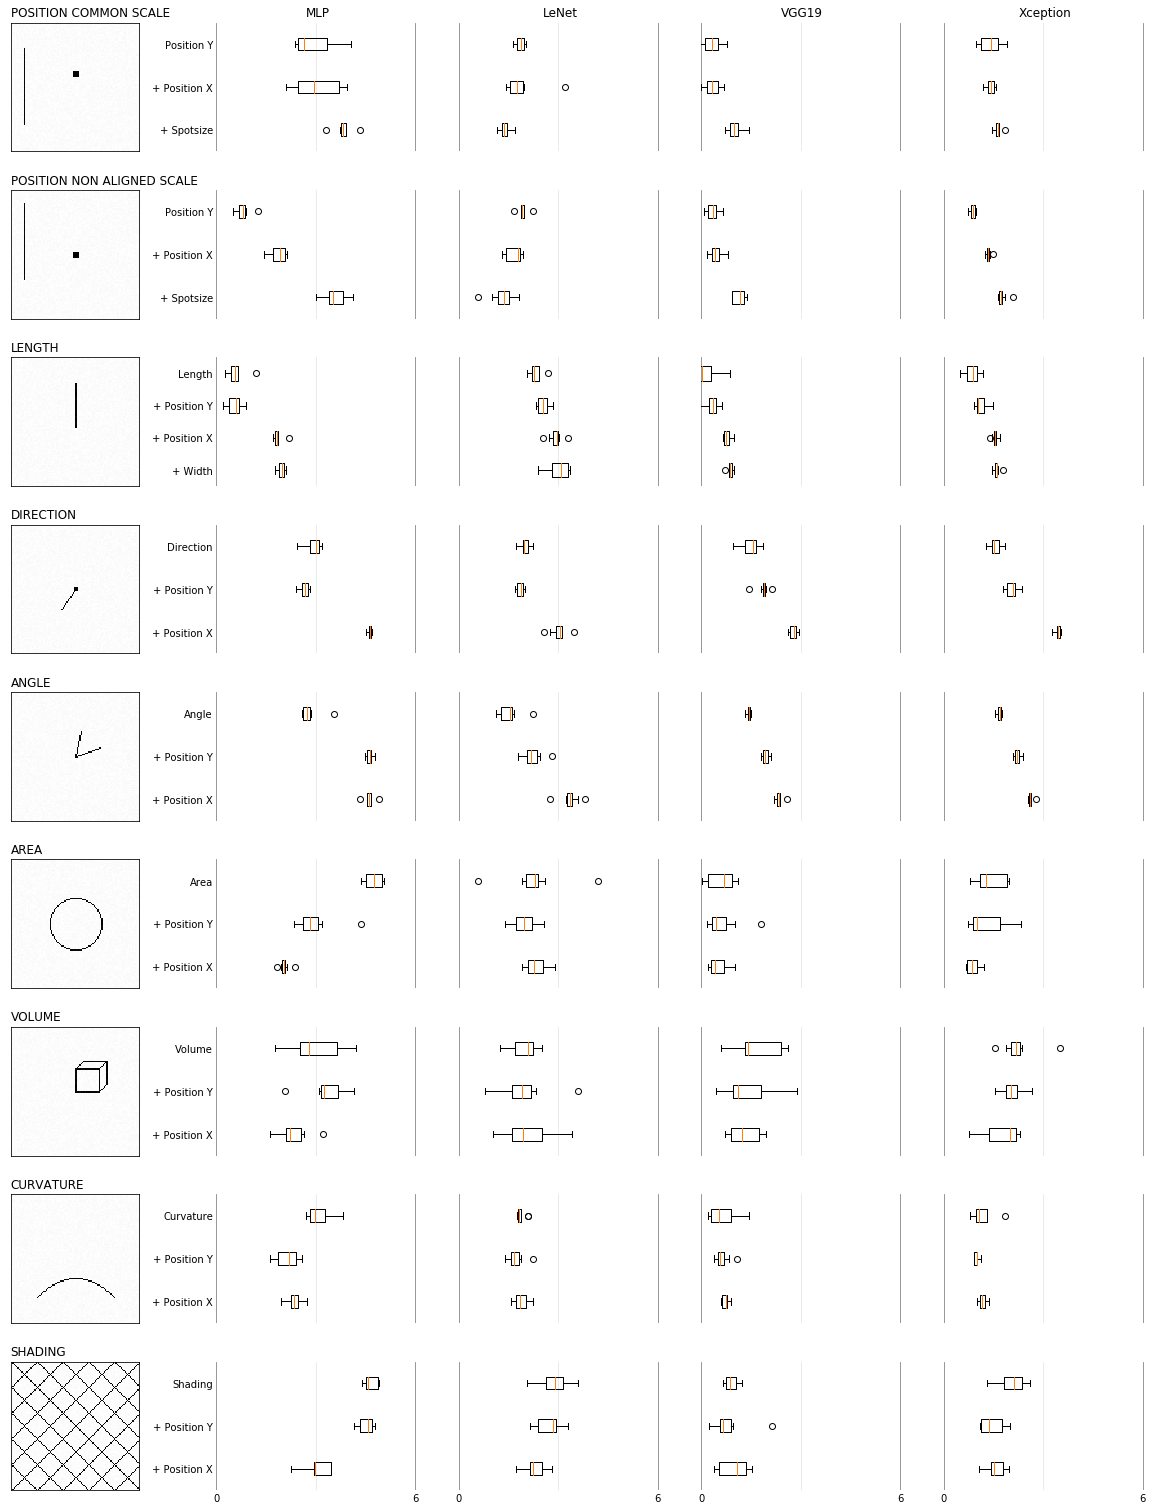

In [30]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(21,len(experiments)*3), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 5, width_ratios=[1,1,1,1,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments

j = 0
for experiment in experiments:
    
    for i,c in enumerate(['Image','MLP', 'LeNet', 'VGG19', 'Xception']):

        fig = plt.subplot(gs[j])
        j += 1

        
        if i == 0:
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()
            
            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

        if j <= len(classifiers)+1:
            plt.title(c)
            

        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
#         print labels
        data = all_results[experiment][i-1]
#         print data

        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor
#         print quarter
        data = [r[quarter:-quarter] for r in sorted_data]
#         print sorted_data
#         print 'before', data
#         data = sorted_data[quarter:-quarter]
#         print 'after', data
    
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
#         print means
        
#         confidence = [mean_confidence_interval(r)[3] for r in data]
        
        confidence = [1.96*np.std(r) for r in data]
        confidence = confidence[::-1]
        
#         # sort the means
#         means.sort()
#         print 'MEANS SORTED', means
        
#         # cut the midmean
#         means = means[1,2]
#         confidence = confidence[1,2]
        
        
#         data_dict = {}
#         data_dict['x'] = means
#         data_dict['xerr'] = confidence
#         data_dict['y'] = 
        
        
        y_pos = range(len(means))


#         means = [3] + means + [10]
#         print means
#         labels = ['a'] + labels + ['Z']
#         print labels
#         confidence = [0] + confidence + [0]
#         print confidence
        
        plt.xlim(0,6.1)
        
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if i != 1:
            ax.get_yaxis().set_ticks([])
#         else:
# #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)
            
        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if j <= 5*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')


        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':

            sorted_data = sorted_data[1:]

        elif experiment=='C.Figure1.curvature':

            sorted_data = sorted_data[:-1]
            
        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
#         print means, labels
        if i == 1:
            boxplots = plt.boxplot(sorted_data[::-1], vert=False, labels=labels)#, xerr=confidence, fmt='o', color='black', capsize=4)
        else:
            boxplots = plt.boxplot(sorted_data[::-1], vert=False, labels=['']*len(labels))
#         print '-'*80
plt.savefig('../PAPER/gfx/figure1_boxplot.pdf', bbox_inches='tight', pad_inches=0)

## Cross-Validation

In [148]:
EXPERIMENT = 'C.Figure1.area'
CLASSIFIER = 'MLP'
DATASETS = ['0', '1', '2']#, '3']

for DATASET in DATASETS:
    stichproben = []
    preds = []
    gts = []
    for i in range(1,5):
        with open(RESULTS_DIR+EXPERIMENT+'/'+DATASET+'/'+CLASSIFIER+'/'+str(i).zfill(2)+'_noise.p', 'r') as f:
            gepickelte_datei = pickle.load(f)
            stichproben.append(gepickelte_datei['MLAE'])
            preds.append(gepickelte_datei['y_pred'].ravel())
            gts.append(gepickelte_datei['y_test'].ravel())

    label = all_labels[EXPERIMENT][int(DATASET)]
    
    print stichproben
    print 'DATA', DATASET, label, np.mean(stichproben), np.std(stichproben)
    print 'PREDS', 'min', np.min(preds), 'max', np.max(preds), 'mean', np.mean(preds), 'stddev',np.std(preds)
    print 'GT', 'min', np.min(gts), 'max', np.max(gts), 'mean', np.mean(gts), 'stddev',np.std(gts)
    print '-'*80
    

[4.9961674399579854, 4.6018013863865219, 4.9775861620677011, 5.0509851755924853]
DATA 0 Area 4.906635041 0.178052401266
PREDS min -0.0243922 max 0.340622 mean 0.132863 stddev 0.0728659
GT min 0.00187617 max 0.950594 mean 0.419776 stddev 0.282251
--------------------------------------------------------------------------------
[2.3535813807155876, 2.919351096564502, 3.0283328826440008, 3.1926845689181009]
DATA 1 + Position Y 2.87348748221 0.315543065084
PREDS min 0.00461019 max 0.991046 mean 0.26156 stddev 0.172126
GT min 0.00500313 max 0.902439 mean 0.301764 stddev 0.233009
--------------------------------------------------------------------------------
[1.9990203122327281, 2.0315199917207942, 2.066447937596597, 2.3697066289895146]
DATA 2 + Position X 2.11667371763 0.148021758577
PREDS min 0.00139271 max 1.17829 mean 0.380296 stddev 0.309237
GT min 0.00500313 max 0.950594 mean 0.397461 stddev 0.313331
--------------------------------------------------------------------------------


In [90]:
print stichproben
print np.mean(stichproben), np.var(stichproben)

[2.5668684923192755, 1.5271388252316846, 4.0017983331903526, 5.7643393157690683, 1.9337126235463267, 3.5604610041134284, 2.2825245770595135, 2.0347820062014703, 1.8903650404751158, 1.9296766775400571]
2.74916668954 1.56473050222


# RANKINGS

## averaged per all classifiers

In [64]:
results = {}
for experiment in experiments:
    
    mean_per_experiment = []
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        mean_per_c = np.mean(means)
        
        mean_per_experiment.append(mean_per_c)
#         print experiment, c, mean_per_c
    results[experiment] = np.mean(mean_per_experiment)
    
for k, v in sorted(results.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

POSITION NON ALIGNED SCALE: 1.42315030709
LENGTH: 1.42325985954
CURVATURE: 1.49431413797
POSITION COMMON SCALE: 1.7149797819
AREA: 1.74911591599
VOLUME: 2.05854229419
SHADING: 2.31821614688
DIRECTION: 2.53953802534
ANGLE: 2.59653054678


## most complex per all classifiers

In [65]:
results = {}
for experiment in experiments:
    
    mean_per_experiment = []
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        
        most_complex_parameters = means[0]
#         print experiment,means[0]
        mean_per_c = most_complex_parameters
        
        mean_per_experiment.append(mean_per_c)
#         print experiment, c, mean_per_c
    results[experiment] = np.mean(mean_per_experiment)
    
for k, v in sorted(results.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

AREA: 1.39502933951
CURVATURE: 1.52110519606
VOLUME: 1.85904417089
LENGTH: 1.88142645647
POSITION COMMON SCALE: 1.94433473833
POSITION NON ALIGNED SCALE: 1.9494254442
SHADING: 1.97493447008
ANGLE: 3.21611596707
DIRECTION: 3.48109283846


## find best classifier on most complex

In [66]:
results = {}
for experiment in experiments:
    
    mean_per_experiment_per_c = [None]*4
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        

        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        most_complex_parameters = means[0]
#         print experiment,means[0]
        mean_per_c = np.mean(means)
        
        mean_per_experiment_per_c[i] = (most_complex_parameters, mean_per_c)
        
#     mean_per_experiment_per_c
#         print experiment, c, mean_per_c
    results[experiment] = mean_per_experiment_per_c#np.mean(mean_per_experiment)
    

print 'Classifier, Averaged across parametrizations, Averaged for most complex parameterization'
for i,c in enumerate(['MLP', 'LeNet', 'VGG19', 'Xception']):
    
    mean_per_c = 0
    mean_per_c_most_complex = 0
    
    for e in experiments:
        mean_per_c += results[e][i][1]
        mean_per_c_most_complex += results[e][i][0]
    
    print c, mean_per_c / float(len(experiments)), mean_per_c_most_complex / float(len(experiments))


Classifier, Averaged across parametrizations, Averaged for most complex parameterization
MLP 2.95098027209 3.14882537665
LeNet 2.13524595612 2.2845531881
VGG19 0.998018420486 1.28149547108
Xception 1.61248735828 1.82846312909


## ranking for VGG19

In [68]:
results_avg = {}
results_best = {}
for experiment in experiments:
    
    i = 2 # VGG19

    #
    # data
    #
    labels = all_labels[experiment]
    labels = labels[::-1]
    data = all_results[experiment][i]


    # grab the MIDMEANS
    sorted_data = [sorted(r) for r in data]
    quarter = len(sorted_data[0]) / 4 # always floor

    data = [r[quarter:-quarter] for r in sorted_data]

    means = [np.mean(r) for r in data]
    means = means[::-1] # we start counting from the bottom


    # trim data
    #
    # POSITION NON ALIGNED SCALE
    # we don't use the just scale experiment anymore due to its lack
    # of parameters but it is part of the Position Y experiment just with more
    # parameters
    # CURVATE
    # we don't mess with the width (distance between the points anymore) since it some
    # how introduced a very very good result which was not reasonable. it seemed
    # like a hard bug to find. this removes one experiment but we think the
    # results were not correct.
    if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
        means = means[:-1]
#             print means
        confidence = confidence[:-1]
        y_pos = y_pos[:-1]
    elif experiment=='C.Figure1.curvature':
#             print means
        means = means[1:]
#             print means
        confidence = confidence[1:]
        y_pos = y_pos[:-1]
    
    most_complex_parameters = means[0]
#         print experiment,means[0]
    mean_per_c = np.mean(means)


#     mean_per_experiment_per_c
#         print experiment, c, mean_per_c
    results_avg[experiment] = mean_per_c#np.mean(mean_per_experiment)
    results_best[experiment] = most_complex_parameters

print 'Averaged'
for k, v in sorted(results_avg.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)
print
print 'Most complex'
for k, v in sorted(results_best.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

Averaged
LENGTH: 0.497473824599
AREA: 0.511359954477
POSITION COMMON SCALE: 0.533684047786
CURVATURE: 0.6164270699
POSITION NON ALIGNED SCALE: 0.632705629082
SHADING: 0.856720410089
VOLUME: 1.37242946469
ANGLE: 1.89770244722
DIRECTION: 2.06366293653

Most complex
AREA: 0.436165202219
CURVATURE: 0.715547211931
LENGTH: 0.878049873475
POSITION COMMON SCALE: 0.976123054942
SHADING: 0.996107830087
POSITION NON ALIGNED SCALE: 1.14187795019
VOLUME: 1.27722191877
ANGLE: 2.33279732016
DIRECTION: 2.77956887793
